In [56]:
# Gerekli kütüphanelerin yüklenmesi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [57]:
df=pd.read_csv('diabetes.csv') #Veri setini yükleme

In [58]:
df.head(3) #İlk 3 satırın gösterilmesi

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


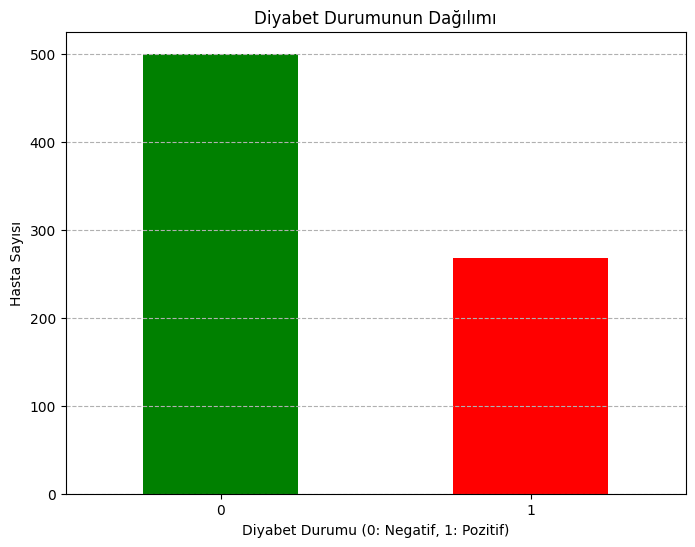

In [59]:
# 'Outcome' sütununun değerlerine göre dağılımı hesaplama
outcome_counts = df['Outcome'].value_counts()

# Çubuk grafik oluşturma
plt.figure(figsize=(8, 6))
outcome_counts.plot(kind='bar',color=['green','red'])
plt.title('Diyabet Durumunun Dağılımı')
plt.xlabel('Diyabet Durumu (0: Negatif, 1: Pozitif)')
plt.ylabel('Hasta Sayısı')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

In [60]:
df.info() #Veri setindeki değerler hakkında bilgi almak için

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [61]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [62]:
df.eq(0).sum() #Her bir özellikte kaç tane 0 var

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [63]:
df.shape #Satır sütun sayısı

(768, 9)

In [64]:
df[[
    'Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'
   ]] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].replace(0,np.NaN)

In [65]:
# Eksik değerlerin doldurulması
df.fillna(df.mean(), inplace = True)

In [66]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1


In [67]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [68]:
df.eq(0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

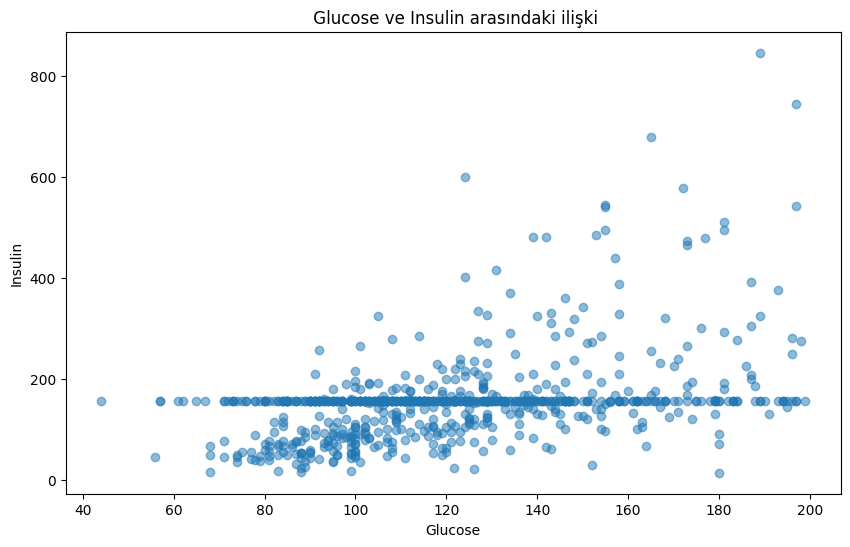

In [69]:
plt.figure(figsize=(10, 6))
# Nokta grafiği oluşturma
plt.scatter(df['Glucose'], df['Insulin'], alpha=0.5)
plt.title(' Glucose ve Insulin arasındaki ilişki')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.show()

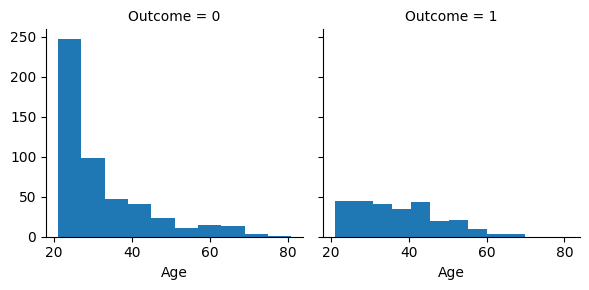

In [70]:
age=sns.FacetGrid(df,col='Outcome')
age.map(plt.hist,'Age')
plt.show()

In [71]:
# Normalizasyonu
normalized_df = (df - df.min()) / (df.max() - df.min())
print(normalized_df.head(6))

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.670968       0.489796       0.304348  0.170130  0.314928   
1     0.058824  0.264516       0.428571       0.239130  0.170130  0.171779   
2     0.470588  0.896774       0.408163       0.240798  0.170130  0.104294   
3     0.058824  0.290323       0.428571       0.173913  0.096154  0.202454   
4     0.000000  0.600000       0.163265       0.304348  0.185096  0.509202   
5     0.294118  0.464516       0.510204       0.240798  0.170130  0.151329   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.234415  0.483333      1.0  
1                  0.116567  0.166667      0.0  
2                  0.253629  0.183333      1.0  
3                  0.038002  0.000000      0.0  
4                  0.943638  0.200000      1.0  
5                  0.052519  0.150000      0.0  


In [72]:
# Giriş ve çıktı değişkenlerini ayırma
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# PCA uygulama
pca = PCA(n_components=2)  # İlk iki ana bileşeni alacağız
X_pca = pca.fit_transform(X)

# LDA uygulama
lda = LDA(n_components=1)  # Sadece 1 bileşen kullanılabilir
X_lda = lda.fit_transform(X, y)

# PCA ve LDA sonuçlarını yazdır
print("PCA Açıklanan Varyans Oranı:", pca.explained_variance_ratio_)
print("LDA Açıklanan Varyans Oranı:", lda.explained_variance_ratio_ if hasattr(lda, 'explained_variance_ratio_') else "LDA varyans oranı mevcut değil")

# PCA bileşen yüklerini analiz etme
pca_components = pca.components_
pca_feature_importance = pd.DataFrame(pca_components, columns=X.columns, index=['PC1', 'PC2'])
print(pca_feature_importance.abs().sort_values(by='PC1', axis=1, ascending=False))

PCA Açıklanan Varyans Oranı: [0.86510267 0.0891348 ]
LDA Açıklanan Varyans Oranı: [1.]
      Insulin   Glucose       Age  SkinThickness       BMI  BloodPressure  \
PC1  0.985616  0.165759  0.020800       0.017170  0.014227       0.012169   
PC2  0.168513  0.968188  0.121365       0.052047  0.048970       0.118503   

     Pregnancies  DiabetesPedigreeFunction  
PC1     0.002510                  0.000402  
PC2     0.018291                  0.001199  


In [73]:
# Bağımsız (X) ve bağımlı (y) değişkenlerin ayrılması
X = df.drop('Outcome', axis=1)  # 'Outcome' sütunu bağımlı değişken, geri kalan her şey bağımsız değişken
y = df['Outcome']

# Veri setinin eğitim ve test kümelerine ayrılması
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)# %70 eğitim, %30 test

# Çoklu Doğrusal Regresyon modelinin oluşturulması
model = LinearRegression()

# Modelin eğitim veri seti üzerinde eğitilmesi
model.fit(X_train, y_train)

# Test veri seti üzerinde tahminlerin yapılması
y_pred = model.predict(X_test)

# Performans metriklerinin hesaplanması
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Performans metriklerinin yazdırılması
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.174317237562553
R^2 Score: 0.2299882356311762


In [74]:
# Veri setini yükleme
df = pd.read_csv('diabetes.csv')

# Yeni özellik oluşturma: BMI ve insulin özelliklerinin çarpımı
df['BMI_Insulin_product'] = df['BMI'] * df['Insulin']

# Bağımsız (X) ve bağımlı (y) değişkenlerin ayrılması
X = df.drop('Outcome', axis=1)  # 'Outcome' sütunu bağımlı değişken, geri kalan her şey bağımsız değişken
y = df['Outcome']

# Veri setini eğitim ve test alt kümelerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Lojistik Regresyon modelini oluşturma ve eğitme
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Test kümesi için tahmin yapma
y_pred = logistic_model.predict(X_test)

# Doğruluk skoru hesaplama
accuracy = accuracy_score(y_test, y_pred)
print("Test Kümesi Doğruluk Skoru (Lojistik Regresyon):", accuracy)

Test Kümesi Doğruluk Skoru (Lojistik Regresyon): 0.7402597402597403


In [75]:
# Veri setini yükleme
df = pd.read_csv('diabetes.csv')

# Bağımsız (X) ve bağımlı (y) değişkenlerin ayrılması
X = df.drop('Outcome', axis=1)  # 'Outcome' sütunu bağımlı değişken, geri kalan her şey bağımsız değişken
y = df['Outcome']

# Veri setini eğitim ve test alt kümelerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # %70 eğitim, %30 test

# Multinominal Lojistik Regresyon modelini oluşturma ve eğitme
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Katsayıları raporlama
logistic_coefficients = logistic_model.coef_
print("Multinominal Lojistik Regresyon Katsayıları:")
for i, coef in enumerate(logistic_coefficients[0]):
    print(f'Özellik {i+1}: {coef}')

# Test kümesi için tahmin yapma
y_pred = logistic_model.predict(X_test)

# Doğruluk skoru hesaplama
accuracy = accuracy_score(y_test, y_pred)
print("\nTest Kümesi Doğruluk Skoru:", accuracy)


Multinominal Lojistik Regresyon Katsayıları:
Özellik 1: 0.05775370825652713
Özellik 2: 0.035901940060149184
Özellik 3: -0.010866290433283063
Özellik 4: -0.001416711651047428
Özellik 5: -0.0009840305626580984
Özellik 6: 0.10909510408853519
Özellik 7: 0.3741512518981942
Özellik 8: 0.036019157624229074

Test Kümesi Doğruluk Skoru: 0.7359307359307359


In [76]:
# Özellikleri standartlaştırma
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Multinomial Lojistik Regresyon modelini oluşturma ve eğitme
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# Model katsayılarını yazdırma
print("Model katsayıları (intercept ve coef):")
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Test kümesi üzerinde tahmin yapma
y_pred = model.predict(X_test)

# Performans metriklerini hesaplama ve yazdırma
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model katsayıları (intercept ve coef):
Intercept: [-0.43000419]
Coefficients: [[ 0.09741379  0.56675123 -0.10208571 -0.01223917 -0.05470839  0.42416132
   0.06970077  0.20963226]]
Confusion Matrix:
[[120  31]
 [ 30  50]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



In [77]:
# Veri setini yükleme
df = pd.read_csv('diabetes.csv')

# Bağımsız (X) ve bağımlı (y) değişkenlerin ayrılması
X = df.drop('Outcome', axis=1)  # 'Outcome' sütunu bağımlı değişken, geri kalan her şey bağımsız değişken
y = df['Outcome']

# 10 kez Holdout yöntemi ile test etme
for i in range(10):
    # Veri setini eğitim ve test alt kümelerine ayırma
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)  # Random_state değişiyor

    # Lojistik Regresyon modelini oluşturma ve eğitme
    logistic_model = LogisticRegression(max_iter=1000)
    logistic_model.fit(X_train, y_train)

    # Test kümesi için tahmin yapma
    y_pred = logistic_model.predict(X_test)

    # Doğruluk skoru hesaplama ve yazdırma
    accuracy = accuracy_score(y_test, y_pred)
    print("Test", i+1, "Doğruluk Skoru:", accuracy)

Test 1 Doğruluk Skoru: 0.7792207792207793
Test 2 Doğruluk Skoru: 0.7835497835497836
Test 3 Doğruluk Skoru: 0.7489177489177489
Test 4 Doğruluk Skoru: 0.7532467532467533
Test 5 Doğruluk Skoru: 0.8095238095238095
Test 6 Doğruluk Skoru: 0.7835497835497836
Test 7 Doğruluk Skoru: 0.7662337662337663
Test 8 Doğruluk Skoru: 0.7792207792207793
Test 9 Doğruluk Skoru: 0.7792207792207793
Test 10 Doğruluk Skoru: 0.7445887445887446


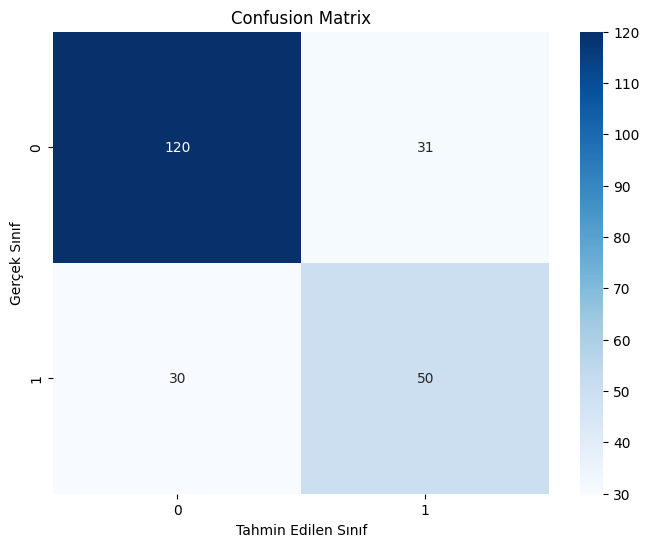

In [78]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Veri setini yükleme
df = pd.read_csv('diabetes.csv')

# Bağımsız (X) ve bağımlı (y) değişkenlerin ayrılması
X = df.drop('Outcome', axis=1)  # 'Outcome' sütunu bağımlı değişken, geri kalan her şey bağımsız değişken
y = df['Outcome']

# Veri setini eğitim ve test alt kümelerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # %70 eğitim, %30 test

# Lojistik Regresyon modelini oluşturma ve eğitme
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Test kümesi üzerinde tahmin yapma
y_pred = logistic_model.predict(X_test)

# Karmaşıklık matrisini hesaplama
conf_matrix = confusion_matrix(y_test, y_pred)

# Karmaşıklık matrisini görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.show()


In [79]:
# Bağımsız değişkenlerin ve hedef değişkenin belirlenmesi için kullanıyoruz.
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Naive Bayes sınıflandırıcısını oluşturma ve eğitme
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Eğitim seti üzerinde modeli değerlendirme
y_train_pred = nb_classifier.predict(X_train)

# Test seti üzerinde modeli değerlendirme
y_test_pred = nb_classifier.predict(X_test)

# Performans metriklerini hesaplama
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

# Sonuçları raporlama
print("Eğitim seti doğruluğu:", train_accuracy)
print("Test seti doğruluğu:", test_accuracy)
print("\nKarışıklık Matrisi:\n", conf_matrix)
print("\nSınıflandırma Raporu:\n", class_report)

Eğitim seti doğruluğu: 0.7672253258845437
Test seti doğruluğu: 0.7445887445887446

Karışıklık Matrisi:
 [[119  32]
 [ 27  53]]

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.82      0.79      0.80       151
           1       0.62      0.66      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231



**FİNAL**



   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


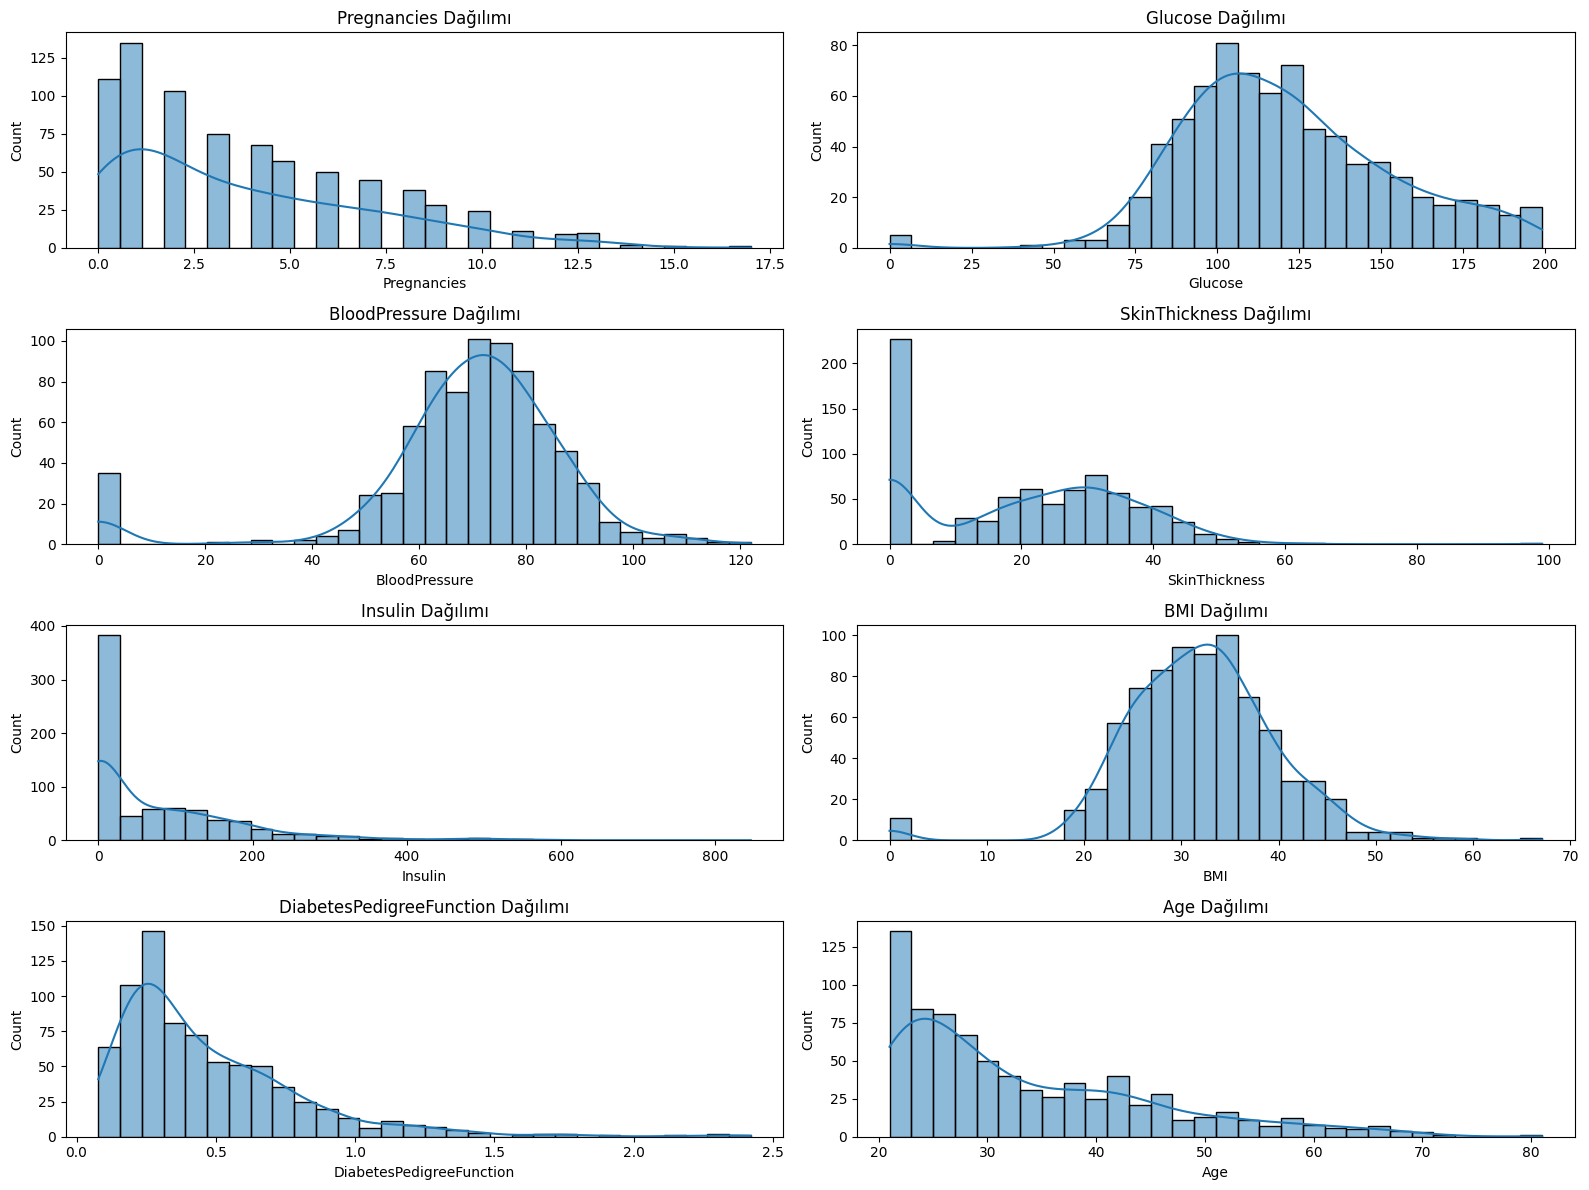

In [80]:
# Veriyi yüklemek
data = pd.read_csv('diabetes.csv')

# İlk 5 satır
print(data.head())

# Veri setindeki tüm özelliklerin dağılımını ve hedef değişkenin dağılımını görselleştirmek
plt.figure(figsize=(16, 12))
for i, column in enumerate(data.columns[:-1]):
    plt.subplot(4, 2, i+1)
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'{column} Dağılımı')
plt.tight_layout()
plt.show()

Pandas kütüphanesini kullanarak verileri bir DataFrame'e yükledim. Ardından, verilerin ilk beş satırı ekrana yazdırdım.

DataFrame'deki her bir özelliğin ve hedef değişkenin dağılımını görselleştiren bir döngü çalıştırılır. Bu, histplot() fonksiyonunu kullanarak yapılır. Bu fonksiyon, verilerin bir histograma çizilmesini sağlar. Kde=True argümanı, yoğunluk eğrisinin de çizilmesini sağlar.

Sonuç olarak, kodun çıkışı, veri setinde her bir özelliğin ve hedef değişkenin dağılımını gösteren bir dizi histogram çizdirdi. Bu görselleştirmeler, verileri analiz etmek ve örüntüleri belirlemek için kullanışlıdır.

Görsellerde görüldüğü gibi dağılımın türü genellikle bir değişkenin ortalamasının etrafında yoğunlaştığı bir eğim gösterir.

**Görselleri ayrıntılı olarak incelediğimizde:**

*Pregnancies: Hamilelik sayısı ne kadar yüksek olursa olsun, hastalık sayısı genel olarak azalmaktadır.

*Glucose: Glikoz seviyesi 100 ile 125 arası hastalarda yoğunlaşmaktadır.

*BloodPressure: Kan basıncı seviyesi 70 ile 80 arası hastalarda yoğunlaşmaktadır.

*SkinThickness: Cilt kalınlığı 0 ile 20 arası hastalarda yoğunlaşmaktadır.

*Insulin: Insulin seviyesi 0 ile 200 arası hastalarda yoğunlaşmaktadır.

*BMI: Vücut kitle indeksi (BMI) 20 ile 30 arası hastalarda yoğunlaşmaktadır.

*DiabetesPedigreeFunction: Diyabet aile öyküsü fonksiyonu 0 ile 1 arası hastalarda yoğunlaşmaktadır.

*Age: Yaş dağılımı 20 ile 50 arası hastalarda yoğunlaşmaktadır.

Bu gözlemler bize diyabet hastalarında bu özelliklerin nasıl dağıldığı konusunda fikir vermektedir.

In [81]:
# Veriyi yüklemek
data = pd.read_csv('diabetes.csv')
# Girdi ve çıktı değişkenlerinin ayrılması
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Veri setini eğitim ve test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Veriyi normalize etme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Girdi ve Çıktı Değişkenlerini Ayırma
X = data.drop('Outcome', axis=1): Bu satır, verilerin girdi bölümünü oluşturan bağımsız değişkenleri içeren bir alt kümeyi çıkarır. 'Outcome' sütunu, verilerin hedef değişkenini temsil eder ve bu nedenle kaldırılmıştır.
y = data['Outcome']: Bu satır, hedef değişkenini (Outcome sütunu) 'y' değişkenine atar. Bu, modelin tahmin etmesi gereken değerdir.

Veri Seti Eğitim ve Test Olarak Ayırma
Bu satır, verileri eğitim ve test kümelerine ayırmak için train_test_split fonksiyonunu kullanır. test_size=0.3, verilerin %30'unun test için kullanılacağını belirtir.

Verileri Normalize Etme
scaler = StandardScaler(): Bu satır, verileri 0 ile 1 arasına ölçeklemek için bir StandardScaler nesnesi oluşturur. Bu işlem, makine öğrenimi modelleri için verilerin performansını iyileştirmeye yardımcı olur.
X_train = scaler.fit_transform(X_train): Bu satır, eğitim verilerini ölçekler. fit_transform, eğitim verileri üzerinde eğitim gerçekleştirir ve ardından verileri dönüştürür.
X_test = scaler.transform(X_test): Bu satır, test verilerini ölçekler. transform, daha önce eğitim verileri üzerinde eğitimini gerçekleştirmiş olan ölçeklemeyi kullanarak test verilerini dönüştürür.
Özetle, bu kod parçası, bir makine öğrenimi modelini eğitmek için verileri hazırlar. Veriler yüklenir, girdi ve çıktı değişkenlerine ayrılır, eğitim ve test kümelerine bölünür ve ardından ölçeklenir. Bu adımlar, modelin daha doğru ve tutarlı sonuçlar üretmesine yardımcı olur.

Confusion Matrix:
 [[119  32]
 [ 27  53]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.80       151
           1       0.62      0.66      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231



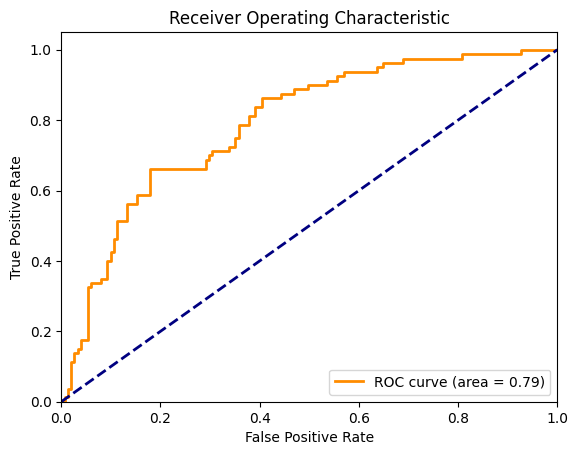

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Veriyi yüklemek
data = pd.read_csv('diabetes.csv')

# Bağımlı ve bağımsız değişkenleri ayırmak
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Veriyi %70 eğitim ve %30 test olarak ayırmak
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Naive Bayes modelini eğitmek
model = GaussianNB()
model.fit(X_train, y_train)

# Test veri seti üzerinde tahmin yapmak
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Sonuçları raporlamak
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", cr)

# ROC Eğrisi ve AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Confusion Matrix:
Confusion Matrix, modelin sınıf 0'ın 119 örneğini ve sınıf 1'in 53 örneğini doğru şekilde sınıflandırdığını göstermektedir. Bununla birlikte, sınıf 0'ın 32 örneğini sınıf 1 olarak ve sınıf 1'in 27 örneğini de sınıf 0 olarak yanlış sınıflandırmıştır.

Classification Report: Sınıflandırma raporu, modelin performansının daha ayrıntılı bir dökümünü sağlar. Her sınıf için kesinlik, geri çağırma ve F1 puanı şöyledir:

Sınıf 0: Hassasiyet = 0,82, Hatırlama = 0,79, F1 puanı = 0,80
Sınıf 1: Hassasiyet = 0,62, Hatırlama = 0,66, F1 puanı = 0,64
F1 puanı, hassasiyet ve hatırlamanın ağırlıklı ortalamasıdır ve modelin performansının dengeli bir ölçümünü sağlar. Sınıf 0 için F1 puanı sınıf 1'den yüksektir; bu da modelin sınıf 0 örneklerini tahmin etmede daha iyi olduğunu gösterir.

Accuracy: Modelin genel doğruluğu 0,74'tür, bu da örneklerin %74'ünü doğru şekilde sınıflandırdığı anlamına gelir.

Macro avg: Makro ortalama, modelin tüm sınıflardaki performansının bir özetini sağlar. Makro ortalama hassasiyet, geri çağırma ve F1 puanı sırasıyla 0,72, 0,73 ve 0,72'dir.

Weighted avg: Ağırlıklı ortalama, her sınıftaki örnek sayısını dikkate alır. Ağırlıklı ortalama hassasiyet, geri çağırma ve F1 puanı sırasıyla 0,75, 0,74 ve 0,75'tir.

ROC Eğrisi: ROC eğrisi modelin farklı eşiklerdeki performansını gösterir. ROC eğrisinin altındaki alan (AUC) 0,79'dur; bu, modelin iki sınıf arasında oldukça iyi bir ayrım yapabildiğini gösterir.

Doğru Pozitif Oranı ve Yanlış Pozitif Oranı: Gerçek pozitif oran ve yanlış pozitif oran, modelin performansına ilişkin ek bilgiler sağlar. Gerçek pozitif oranın sınıf 0 için yüksek olması, modelin bu sınıf için gerçek pozitifleri tespit etmede iyi olduğunu gösterir. Yanlış pozitif oranı nispeten düşüktür, bu da modelin yanlış alarmlara yatkın olmadığını gösterir.

Genel olarak modelin performansı iyi, ancak geliştirilmesi gerek. Model, sınıf 0 örneklerini tahmin etmede daha iyidir ancak sınıf 1 örnekleriyle mücadele etmektedir. ROC eğrisi ve AUC, modelin iki sınıf arasında ayrım yapabildiğini ancak performansını artırmak için daha fazla ayarlama yapmak gereklidir.

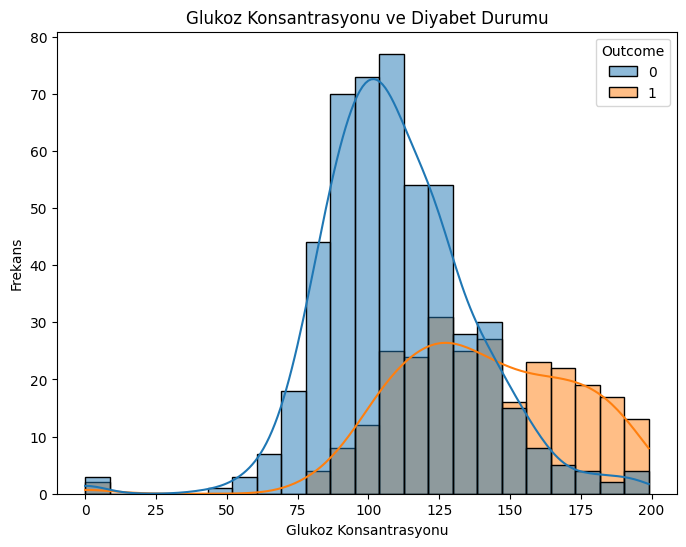

In [83]:
plt.figure(figsize=(8, 6))
sns.histplot(x='Glucose', data=data, kde=True, hue='Outcome')
plt.title('Glukoz Konsantrasyonu ve Diyabet Durumu')
plt.xlabel('Glukoz Konsantrasyonu')
plt.ylabel('Frekans')
plt.show()

Bu grafik, diyabet durumuna göre glukoz konsantrasyonunun dağılımını gösteriyor. Diyabetli hastaların daha yüksek glukoz konsantrasyonlarına sahip olma eğiliminde olduğu görülebiliyor. Bununla birlikte, diyabetli olmayan kişilerde de yüksek glukoz seviyeleri görülebiliyor

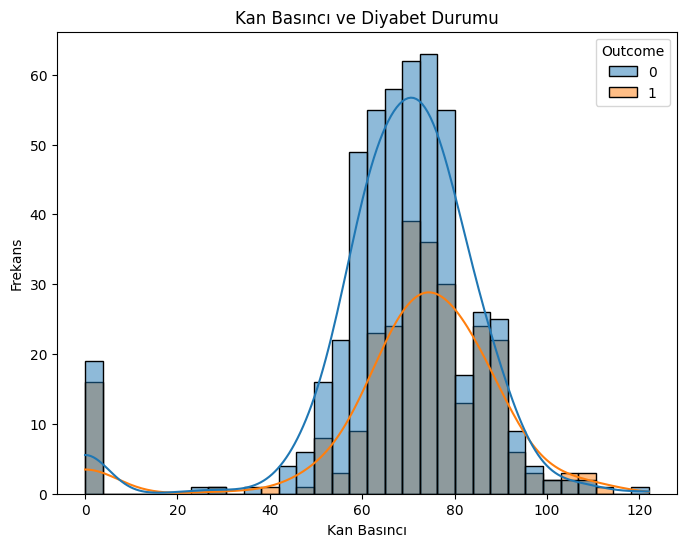

In [84]:
plt.figure(figsize=(8, 6))
sns.histplot(x='BloodPressure', data=data, kde=True, hue='Outcome')
plt.title('Kan Basıncı ve Diyabet Durumu')
plt.xlabel('Kan Basıncı')
plt.ylabel('Frekans')
plt.show()

Bu grafik, diyabetli ve diyabetsiz kişilerde kan basıncı dağılımını gösteren bir histogram. Grafikten, diyabetli kişilerin kan basıncının diyabetsiz kişilere göre daha yüksek olma eğiliminde olduğunu görebiliyoruz. Ayrıca diyabetli kişilerde daha yüksek kan basıncı değerlerinin yoğunlaştığını da gözlemliyoruz.

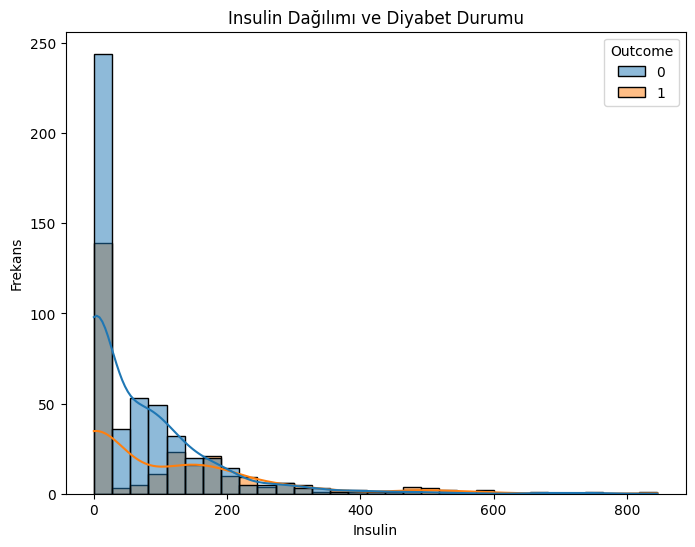

In [85]:
plt.figure(figsize=(8, 6))
sns.histplot(x='Insulin', data=data, kde=True, hue='Outcome')
plt.title('Insulin Dağılımı ve Diyabet Durumu')
plt.xlabel('Insulin')
plt.ylabel('Frekans')
plt.show()

Bu grafik, insülin dağılımının diyabet durumu ile ilişkisini gösteren bir histogram. Histogram, diyabetli kişilerin insülin düzeylerinin diyabetli olmayan kişilere göre daha yüksek olduğunu göstermektedir. Ayrıca diyabetli kişilerin insülin düzeylerinin daha geniş bir dağılıma sahip olduğunu da göstermektedir.

En iyi K değeri: 11
Confusion Matrix:
 [[123  28]
 [ 34  46]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.81      0.80       151
           1       0.62      0.57      0.60        80

    accuracy                           0.73       231
   macro avg       0.70      0.69      0.70       231
weighted avg       0.73      0.73      0.73       231



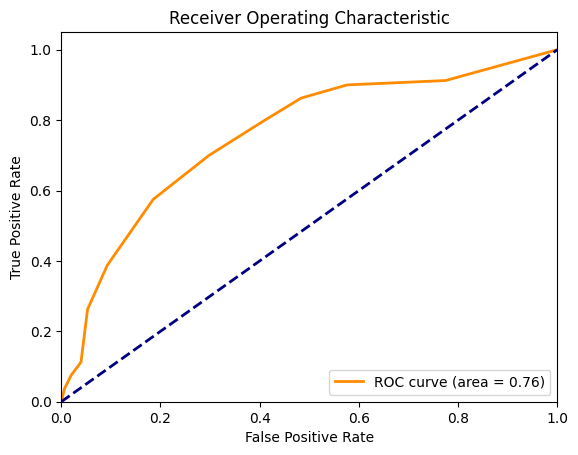

In [86]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Veriyi yüklemek
data = pd.read_csv('diabetes.csv')

# Bağımlı ve bağımsız değişkenleri ayırmak
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Veriyi %70 eğitim ve %30 test olarak ayırmak
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# En iyi K değerini belirlemek
k_values = list(range(1, 31))
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# En iyi K değerini seçmek
best_k = k_values[np.argmax(cv_scores)]
print(f'En iyi K değeri: {best_k}')

# K-NN modelini en iyi K değeri ile eğitmek
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Test veri seti üzerinde tahmin yapmak
y_pred = best_knn.predict(X_test)
y_prob = best_knn.predict_proba(X_test)[:, 1]

# Sonuçları raporlamak
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", cr)

# ROC Eğrisi ve AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

En iyi K değeri: 11 Bu, modelin sınıflandırma algoritması olarak K-En Yakın Komşuları kullandığı ve "k" parametresi için optimal değerin 11 olduğu anlamına gelmektedir. Bu, modelin eğitim verilerindeki en yakın 11 komşusuna dayalı olarak yeni bir veri noktasını sınıflandırdığı anlamına gelir.

Karışıklık Matrisi: Bu tablo modelin performansını gösterir.
[123 28] İlk satır, modelin birinci sınıfa yönelik tahminlerine karşılık gelmektedir. Doğru tahmin edilen 123 veri noktası birinci sınıfa aitken, 28 veri noktası birinci sınıfa ait olarak yanlış tahmin edilmiştir.

[34 46] İkinci satır, modelin ikinci sınıfa ilişkin tahminlerine karşılık gelmektedir. 34 veri noktasının ikinci sınıfa ait olduğu yanlış tahmin edilmiş, 46 veri noktasının ise ikinci sınıfa ait olduğu doğru tahmin edilmiştir.

Classification Report: Bu tablo, modelin performansının daha ayrıntılı bir özetini sağlar.

Precision: Doğru tahmin edilen pozitif örneklerin, tahmin edilen tüm pozitif örneklere oranı.

Recall: Doğru tahmin edilen olumlu örneklerin tüm gerçek olumlu örneklere oranı.

f1-score: Hassasiyet ve hatırlamanın harmonik ortalaması. Bu, iki ölçüm arasında bir denge sağlar.

Support: Her sınıf için örnek sayısı.

Receiver Operating Characteristic (ROC) Curve: ROC eğrisi, modelin tahmininin farklı eşikleri için gerçek pozitif oranın yanlış pozitif oranına karşı grafiğini çizer.

ROC eğrisi (alan = 0,76): ROC eğrisinin altındaki alan (AUC), modelin iki sınıf arasında ayrım yapma yeteneğinin bir ölçüsüdür. 0,76'lık bir AUC oldukça iyi bir performansı gösterir.

Sonuç olarak model oldukça iyi bir performans sergiliyor, iyi bir doğruluk ve makul bir f1 puanı elde ediyor gibi görünüyor. Ancak kesinlik ve geri çağırma değerlerinden de anlaşılacağı üzere model, birinci sınıfı tahmin etmede ikinci sınıftan daha iyi görünüyor.

MLP Confusion Matrix:
 [[123  28]
 [ 36  44]]

MLP Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.81      0.79       151
           1       0.61      0.55      0.58        80

    accuracy                           0.72       231
   macro avg       0.69      0.68      0.69       231
weighted avg       0.72      0.72      0.72       231



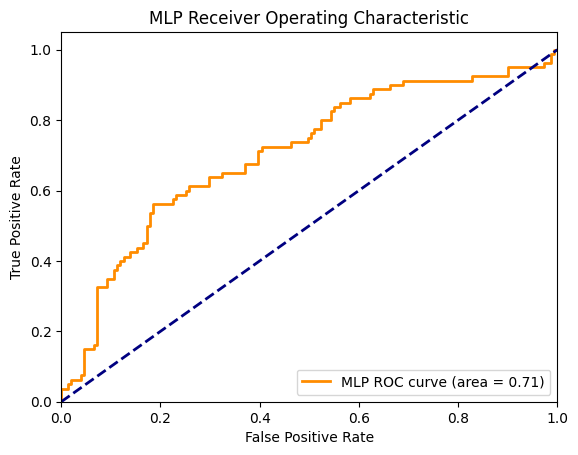

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc


# Veriyi yüklemek
data = pd.read_csv('diabetes.csv')

# Bağımlı ve bağımsız değişkenleri ayırmak
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Veriyi %70 eğitim ve %30 test olarak ayırmak
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Multi-Layer Perceptron (MLP) Sınıflandırıcısı

# MLP modelini eğitmek
mlp = MLPClassifier(random_state=42, max_iter=500)
mlp.fit(X_train, y_train)

# Test veri seti üzerinde tahmin yapmak
y_pred_mlp = mlp.predict(X_test)
y_prob_mlp = mlp.predict_proba(X_test)[:, 1]

# Sonuçları raporlamak
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
cr_mlp = classification_report(y_test, y_pred_mlp)

print("MLP Confusion Matrix:\n", cm_mlp)
print("\nMLP Classification Report:\n", cr_mlp)

# MLP ROC Eğrisi ve AUC
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, y_prob_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

plt.figure()
plt.plot(fpr_mlp, tpr_mlp, color='darkorange', lw=2, label='MLP ROC curve (area = %0.2f)' % roc_auc_mlp)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



MLP Confusion Matrix: Modelin gerçek pozitif, gerçek negatif, yanlış pozitif ve yanlış negatif sayısını gösterir. Bu durumda modelin 123 gerçek pozitif, 28 yanlış pozitif, 36 yanlış negatif ve 44 gerçek negatif tahmin ettiği görülmektedir.

ROC Eğrisi: Farklı eşiklerde modelin gerçek pozitif oranı (TPR) ve yanlış pozitif oranı (FPR) arasındaki ilişkiyi gösterir. Eğri ne kadar sol üst köşeye yakınsa modelin performansı o kadar iyidir. Bu durumda, eğrinin altındaki alan (AUC) 0.71'dir, bu da oldukça iyi bir performansa işaret etmektedir.

MLP Classification Report: Modelin precision, recall, F1 puanını ve her sınıf için desteği gösterir. precision, modelin pozitif olarak sınıflandırdığı örneklerin gerçekte pozitif olma oranını gösterirken, recall, modelin gerçekte pozitif olan örneklerin tamamını doğru bir şekilde sınıflandırma oranını gösterir.

F1 puanı, precision ve recall uyumlu bir ölçüsüdür. Bu durumda, modelin 0 sınıfı için %77 precision, %81 recall ve %79 F1 puanı olduğu görülmektedir; 1 sınıfı için ise %61 precision, %55 recall ve %58 F1 puanı bulunmaktadır.

Sonuç, modelin iyi bir performansa sahip olduğu söylenebilir. Ancak, 1 sınıfı için modelin precision ve recall 0 sınıfına göre daha düşük. Bu, modelin 1 sınıfını biraz daha zor sınıflandırabildiği anlamına geliyor. Modelin performansını artırmak için, veri dengesini sağlamak, özellik mühendisliği uygulamak veya farklı algoritmalar denemek gibi yöntemler denenmeli.



SVM Confusion Matrix:
 [[131  20]
 [ 41  39]]

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.87      0.81       151
           1       0.66      0.49      0.56        80

    accuracy                           0.74       231
   macro avg       0.71      0.68      0.69       231
weighted avg       0.73      0.74      0.72       231



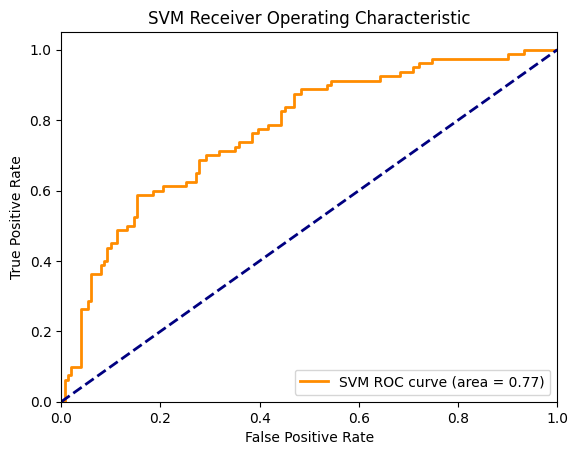

In [88]:
### Support Vector Machines (SVM) Sınıflandırıcısı

# SVM modelini eğitmek
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)

# Test veri seti üzerinde tahmin yapmak
y_pred_svm = svm.predict(X_test)
y_prob_svm = svm.predict_proba(X_test)[:, 1]

# Sonuçları raporlamak
cm_svm = confusion_matrix(y_test, y_pred_svm)
cr_svm = classification_report(y_test, y_pred_svm)

print("SVM Confusion Matrix:\n", cm_svm)
print("\nSVM Classification Report:\n", cr_svm)

# SVM ROC Eğrisi ve AUC
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='SVM ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Confusion Matrix:
[[131 20], [41 39]]: Bu matris modelin tahminlerini özetler.
131 sınıf 0 örneğini doğru şekilde tahmin etti (gerçek pozitifler).
Sınıf 0'ın 20 örneğinin sınıf 1 olarak yanlış tahmin edilmesi (yanlış negatifler).
Sınıf 1'in 41 örneğini sınıf 0 olarak yanlış tahmin etti (yanlış pozitifler).
Sınıf 1'in 39 örneğini doğru tahmin etti (gerçek negatifler).

Classification Report:
Precision: Gerçek pozitiflerin, tahmin edilen toplam pozitiflere oranı. Daha yüksek hassasiyet, daha az hatalı pozitif sonuç anlamına gelir.
Sınıf 0: 0,76
Sınıf 1: 0,66

Recall: Gerçek pozitiflerin toplam gerçek pozitiflere oranı. Daha yüksek hatırlama, daha az yanlış negatif anlamına gelir.
Sınıf 0: 0,87
Sınıf 1: 0,49

F1-Score: Hassasiyet ve hatırlamanın harmonik ortalaması, dengeli bir ölçüm sağlar.
Sınıf 0: 0,81
Sınıf 1: 0,56

Support: Veri kümesindeki her sınıfa ait örnek sayısı.
Sınıf 0: 151
Sınıf 1: 80

Accuracy: Modelin genel doğruluğu.
Accuracy: 0,74

Macro Average: Sınıflar arasındaki hassasiyet, hatırlama ve F1 puanının ortalaması.
Macro Average: 0,69

Weighted Average: Her sınıfın desteğine göre ağırlıklandırılan hassasiyet, geri çağırma ve F1 puanının ortalaması.
Weighted Average: 0,72

ROC Eğrisi ve AUC:
ROC Eğrisi: Modelin farklı sınıflandırma eşiklerindeki performansının grafiksel temsili.

AUC (Eğri Altındaki Alan): Modelin genel performansını özetleyen bir ölçüm. Daha yüksek bir AUC daha iyi bir modele işaret eder.
AUC: 0,77

SVM modelinin bu sınıflandırma görevinde orta derecede iyi performans gösterdiği görülmektedir. Sınıf 0 için nispeten iyi bir kesinliğe sahiptir, bu da sınıf 0 olarak tahmin edilen çoğu örneği doğru şekilde tanımladığını gösterir. Ancak, daha düşük hatırlama ve daha yüksek sayıda yanlış negatif nedeniyle sınıf 1 ile mücadele eder. Bu, modelin sınıf 1'in tüm gerçek örneklerini yakalamakta zorluk çekebileceğini gösteriyor. ROC eğrisi ve AUC aynı zamanda makul performansı gösteriyor ve modelin iki sınıf arasında bir dereceye kadar ayrım yapabildiğini gösteriyor.